# COVID19 en Chile

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import io
import requests
import os

## DP8 - Pacientes COVID-19 en UCI por región

In [2]:
# Paso 1: Importar data
url = 'https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto8/UCI_T.csv'
dl = requests.get(url).content
dp8 = pd.read_csv(io.StringIO(dl.decode('utf-8')))
dp8.rename(columns={'Region':'Fecha'},inplace=True)
dp8_edit = dp8.drop([0,1], axis=0)
dp8_edit['Fecha'] = pd.to_datetime(dp8_edit['Fecha'])
dp8_edit['Fecha'].tail(1)

380   2021-04-14
Name: Fecha, dtype: datetime64[ns]

In [3]:
# Paso 2: Transformar data
seleccion_regiones = ['Arica y Parinacota','Tarapacá','Antofagasta','Atacama','Coquimbo',
                      'Valparaíso','O’Higgins','Maule','Ñuble','Biobío','Araucanía',
                      'Los Ríos','Los Lagos','Aysén','Magallanes']
dp8_edit['Otras Regiones'] = dp8_edit[seleccion_regiones].sum(axis=1)

dp8_edit['Date'] = dp8_edit['Fecha']
dp8_edit['Date'] = dp8_edit['Date'].dt.strftime('%Y-%m-%d')
ultima_fecha = dp8_edit[['Date']].tail(1).iloc[0]['Date']
ultima_fecha

'2021-04-14'

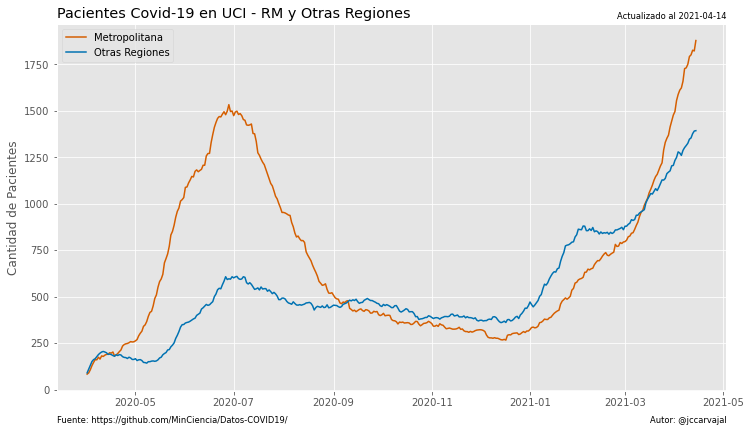

In [4]:
# Paso 3: Visualizar data
plt.style.use('ggplot')
plt.figure(figsize=(12,6.75))
plt.plot(dp8_edit['Fecha'], dp8_edit['Metropolitana'],  color='#D55E00')
plt.plot(dp8_edit['Fecha'], dp8_edit['Otras Regiones'], color='#0072B2')
plt.grid(True)
plt.legend(['Metropolitana', 'Otras Regiones'], loc='upper left')
plt.title('Pacientes Covid-19 en UCI - RM y Otras Regiones', loc='left')
plt.ylabel('Cantidad de Pacientes')
plt.annotate('Actualizado al ' + str(ultima_fecha), 
             xy=(1,1), xytext=(0,12), xycoords='axes fraction',textcoords='offset points', 
             fontsize='small', va='top', ha='right')
plt.annotate('Fuente: https://github.com/MinCiencia/Datos-COVID19/',
             xy=(0,0), xytext=(0,-25), xycoords='axes fraction', textcoords='offset points',
             fontsize='small', va='top', ha='left')
plt.annotate('Autor: @jccarvajal',
             xy=(1,0), xytext=(0,-25), xycoords='axes fraction', textcoords='offset points',
             fontsize='small', va='top', ha='right')

# Guardar figura en directorio
directory = 'Covid_19_Figures'
filename = 'DP08_Hospitalizados_UCI_Regiones.png'
if not os.path.exists(directory):
    os.makedirs(directory)
savepath = os.path.join(directory, filename)
plt.savefig(savepath, dpi=200)
plt.show()

## DP9 - Pacientes COVID-19 en UCI por grupo de edad

In [5]:
# Paso 1: Importar data
url = 'https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto9/HospitalizadosUCIEtario_T.csv'
dl = requests.get(url).content
dp9 = pd.read_csv(io.StringIO(dl.decode('utf-8')))
dp9.rename(columns={'Grupo de edad':'Fecha'},inplace=True)
dp9['Fecha'] = pd.to_datetime(dp9['Fecha'])

In [6]:
# Paso 2: Transformar data
dp9['Date'] = dp9['Fecha']
dp9['Date'] = dp9['Date'].dt.strftime('%Y-%m-%d')
ultima_fecha = dp9[['Date']].tail(1).iloc[0]['Date']
ultima_fecha

'2021-04-14'

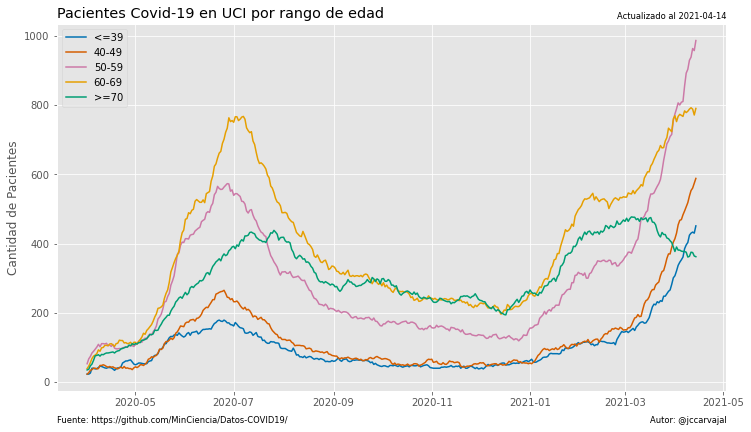

In [7]:
# Paso 3: Visualizar data
plt.style.use('ggplot')
plt.figure(figsize=(12,6.75))
plt.plot(dp9['Fecha'], dp9['<=39'],  color='#0072B2')
plt.plot(dp9['Fecha'], dp9['40-49'], color='#D55E00')
plt.plot(dp9['Fecha'], dp9['50-59'], color='#CC79A7')
plt.plot(dp9['Fecha'], dp9['60-69'], color='#E69F00')
plt.plot(dp9['Fecha'], dp9['>=70'],  color='#009E73')
plt.grid(True)
plt.legend(['<=39', '40-49', '50-59', '60-69', '>=70'], loc='upper left')
plt.title('Pacientes Covid-19 en UCI por rango de edad', loc='left')
plt.ylabel('Cantidad de Pacientes')
plt.annotate('Actualizado al ' + str(ultima_fecha), 
             xy=(1,1), xytext=(0,12), xycoords='axes fraction',textcoords='offset points', 
             fontsize='small', va='top', ha='right')
plt.annotate('Fuente: https://github.com/MinCiencia/Datos-COVID19/',
             xy=(0,0), xytext=(0,-25), xycoords='axes fraction', textcoords='offset points',
             fontsize='small', va='top', ha='left')
plt.annotate('Autor: @jccarvajal',
             xy=(1,0), xytext=(0,-25), xycoords='axes fraction', textcoords='offset points',
             fontsize='small', va='top', ha='right')

# Guardar figura en directorio
directory = 'Covid_19_Figures'
filename = 'DP09_Hospitalizados_UCI_Etario.png'
if not os.path.exists(directory):
    os.makedirs(directory)
savepath = os.path.join(directory, filename)
plt.savefig(savepath, dpi=200)
plt.show()

## DP10 - Fallecidos con COVID-19 por grupo de edad

In [8]:
# Paso 1: Importar data
url = 'https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto10/FallecidosEtario_T.csv'
dl = requests.get(url).content
dp10 = pd.read_csv(io.StringIO(dl.decode('utf-8')))
dp10.rename(columns={'Grupo de edad':'Fecha'},inplace=True)
dp10['Fecha'] = pd.to_datetime(dp10['Fecha'])

In [9]:
# Paso 2: Transformar data
dp10['Date'] = dp10['Fecha']
dp10['Date'] = dp10['Date'].dt.strftime('%Y-%m-%d')
ultima_fecha = dp10[['Date']].tail(1).iloc[0]['Date']
ultima_fecha

'2021-04-14'

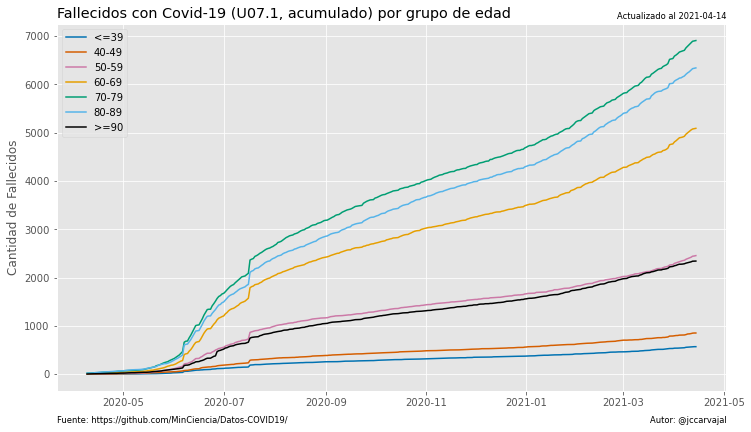

In [10]:
# Paso 3: Visualizar data
plt.style.use('ggplot')
plt.figure(figsize=(12,6.75))
plt.plot(dp10['Fecha'], dp10['<=39'],  color='#0072B2')
plt.plot(dp10['Fecha'], dp10['40-49'], color='#D55E00')
plt.plot(dp10['Fecha'], dp10['50-59'], color='#CC79A7')
plt.plot(dp10['Fecha'], dp10['60-69'], color='#E69F00')
plt.plot(dp10['Fecha'], dp10['70-79'], color='#009E73')
plt.plot(dp10['Fecha'], dp10['80-89'], color='#56B4E9')
plt.plot(dp10['Fecha'], dp10['>=90'],  color='#000000')
plt.grid(True)
plt.legend(['<=39', '40-49', '50-59', '60-69', '70-79', '80-89', '>=90'], loc='upper left')
plt.title('Fallecidos con Covid-19 (U07.1, acumulado) por grupo de edad', loc='left')
plt.ylabel('Cantidad de Fallecidos')
plt.annotate('Actualizado al ' + str(ultima_fecha), 
             xy=(1,1), xytext=(0,12), xycoords='axes fraction',textcoords='offset points', 
             fontsize='small', va='top', ha='right')
plt.annotate('Fuente: https://github.com/MinCiencia/Datos-COVID19/',
             xy=(0,0), xytext=(0,-25), xycoords='axes fraction', textcoords='offset points',
             fontsize='small', va='top', ha='left')
plt.annotate('Autor: @jccarvajal',
             xy=(1,0), xytext=(0,-25), xycoords='axes fraction', textcoords='offset points',
             fontsize='small', va='top', ha='right')

# Guardar figura en directorio
directory = 'Covid_19_Figures'
filename = 'DP10_Fallecidos_UCI_Etario_Acumulado.png'
if not os.path.exists(directory):
    os.makedirs(directory)
savepath = os.path.join(directory, filename)
plt.savefig(savepath, dpi=200)
plt.show()

# DP13 - Casos totales por región

In [11]:
# Paso 1: Importar data
url = 'https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto13/CasosNuevosCumulativo_T.csv'
dl = requests.get(url).content
dp13 = pd.read_csv(io.StringIO(dl.decode('utf-8')))
dp13.rename(columns={'Region':'Fecha','Total':'Nacional'},inplace=True)
dp13['Fecha'] = pd.to_datetime(dp13['Fecha'])

In [12]:
# Paso 2: Transformar data
dp13_edit1_mm = dp13.iloc[:, 0]
dp13_edit2_mm = dp13.iloc[:, 1:18].rolling(7).mean()
dp13_edit_mm = pd.concat([dp13_edit1_mm, dp13_edit2_mm], axis=1)
#dp13_edit_mm.tail(1)

dp13_edit_mm['Date'] = dp13_edit_mm['Fecha']
dp13_edit_mm['Date'] = dp13_edit_mm['Date'].dt.strftime('%Y-%m-%d')
ultima_fecha = dp13_edit_mm[['Date']].tail(1).iloc[0]['Date']
ultima_fecha

'2021-04-14'

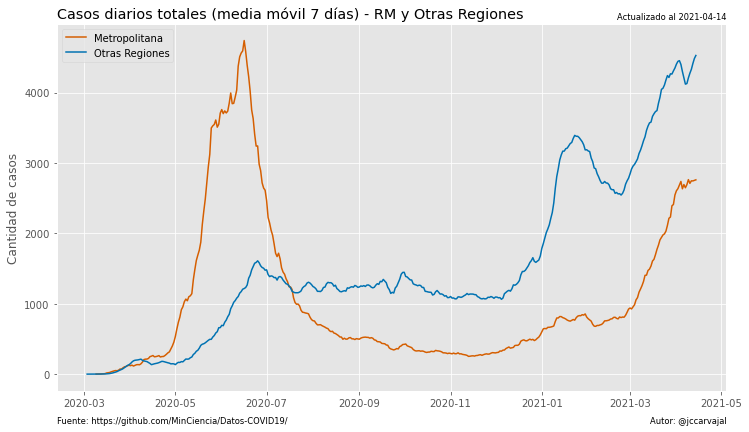

In [13]:
# Paso 3: Visualizar data
dp13_edit_or = dp13_edit_mm.copy()
seleccion_regiones = ['Arica y Parinacota','Tarapacá','Antofagasta','Atacama','Coquimbo',
                      'Valparaíso','O’Higgins','Maule','Ñuble','Biobío','Araucanía',
                      'Los Ríos','Los Lagos','Aysén','Magallanes']
dp13_edit_or['Otras Regiones'] = dp13_edit_or[seleccion_regiones].sum(axis=1)

plt.style.use('ggplot')
plt.figure(figsize=(12,6.75))
plt.plot(dp13_edit_or['Fecha'], dp13_edit_or['Metropolitana'],  color='#D55E00')
plt.plot(dp13_edit_or['Fecha'], dp13_edit_or['Otras Regiones'],  color='#0072B2')
plt.grid(True)
plt.legend(['Metropolitana', 'Otras Regiones'], loc='upper left')
plt.title('Casos diarios totales (media móvil 7 días) - RM y Otras Regiones', loc='left')
plt.ylabel('Cantidad de casos')
plt.annotate('Actualizado al ' + str(ultima_fecha), 
             xy=(1,1), xytext=(0,12), xycoords='axes fraction',textcoords='offset points', 
             fontsize='small', va='top', ha='right')
plt.annotate('Fuente: https://github.com/MinCiencia/Datos-COVID19/',
             xy=(0,0), xytext=(0,-25), xycoords='axes fraction', textcoords='offset points',
             fontsize='small', va='top', ha='left')
plt.annotate('Autor: @jccarvajal',
             xy=(1,0), xytext=(0,-25), xycoords='axes fraction', textcoords='offset points',
             fontsize='small', va='top', ha='right')

# Guardar figura en directorio
directory = 'Covid_19_Figures'
filename = 'DP13_Casos_Diarios_Totales_media_movil.png'
if not os.path.exists(directory):
    os.makedirs(directory)
savepath = os.path.join(directory, filename)
plt.savefig(savepath, dpi=200)
plt.show()

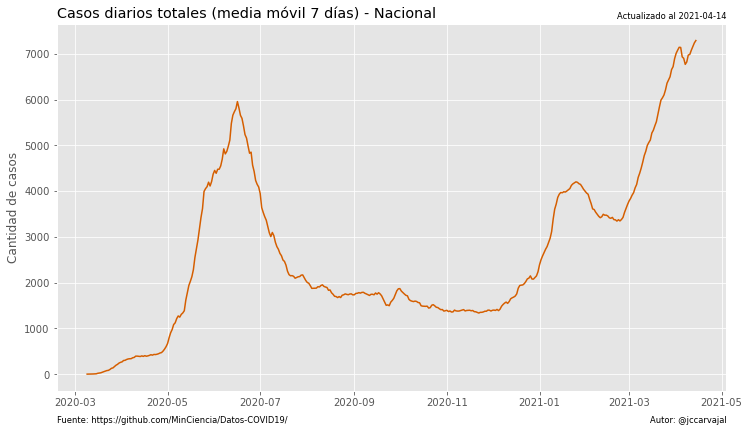

In [14]:
# Paso 3: Visualizar data
dp13_edit_nac = dp13_edit_mm.copy()

plt.style.use('ggplot')
plt.figure(figsize=(12,6.75))
plt.plot(dp13_edit_nac['Fecha'], dp13_edit_nac['Nacional'],  color='#D55E00')
plt.grid(True)
plt.title('Casos diarios totales (media móvil 7 días) - Nacional', loc='left')
plt.ylabel('Cantidad de casos')
plt.annotate('Actualizado al ' + str(ultima_fecha), 
             xy=(1,1), xytext=(0,12), xycoords='axes fraction',textcoords='offset points', 
             fontsize='small', va='top', ha='right')
plt.annotate('Fuente: https://github.com/MinCiencia/Datos-COVID19/',
             xy=(0,0), xytext=(0,-25), xycoords='axes fraction', textcoords='offset points',
             fontsize='small', va='top', ha='left')
plt.annotate('Autor: @jccarvajal',
             xy=(1,0), xytext=(0,-25), xycoords='axes fraction', textcoords='offset points',
             fontsize='small', va='top', ha='right')

# Guardar figura en directorio
directory = 'Covid_19_Figures'
filename = 'DP13_Casos_Diarios_Totales_media_movil_Nacional.png'
if not os.path.exists(directory):
    os.makedirs(directory)
savepath = os.path.join(directory, filename)
plt.savefig(savepath, dpi=200)
plt.show()

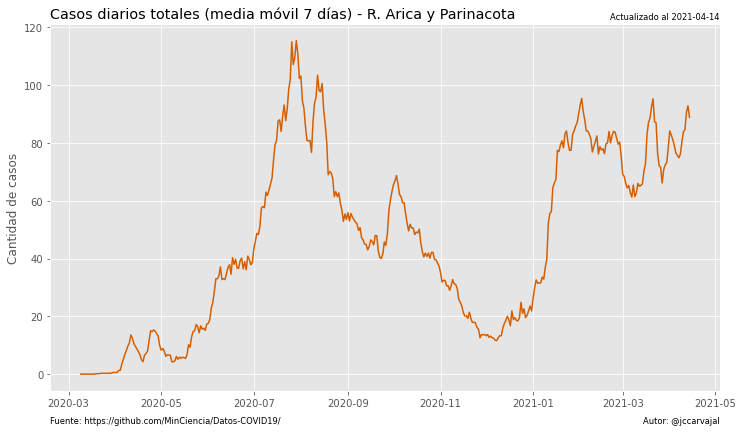

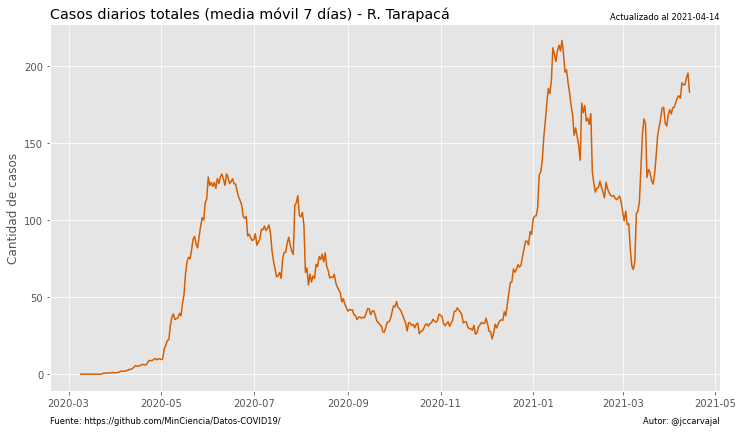

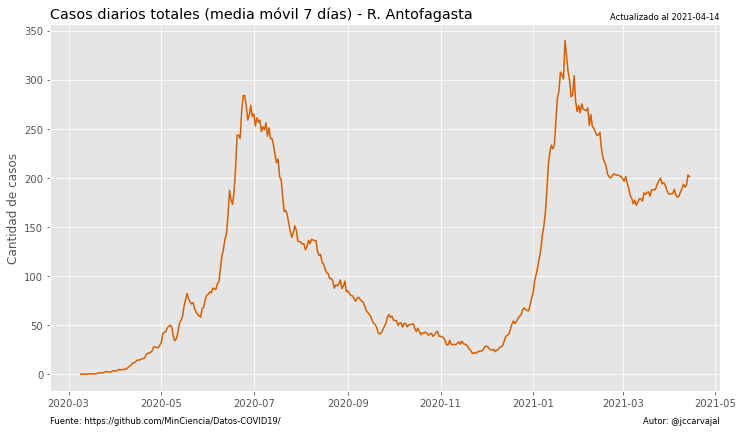

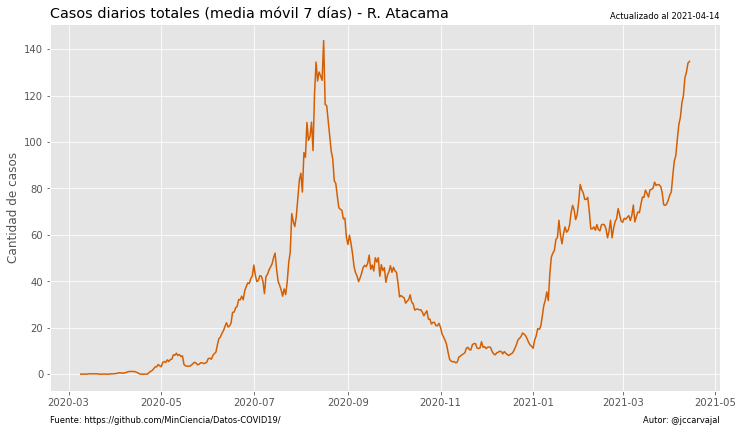

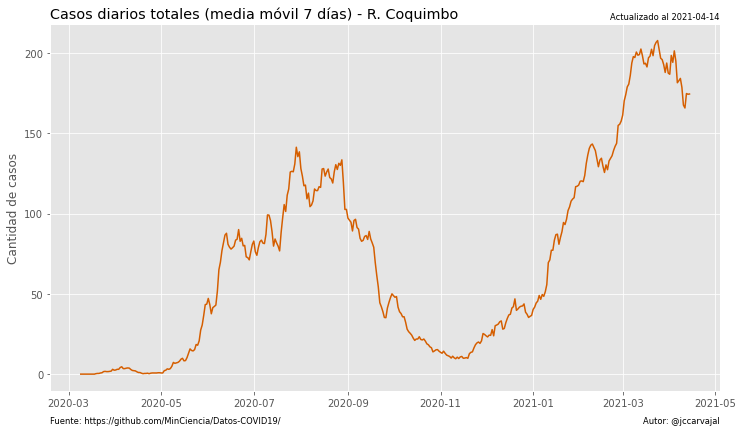

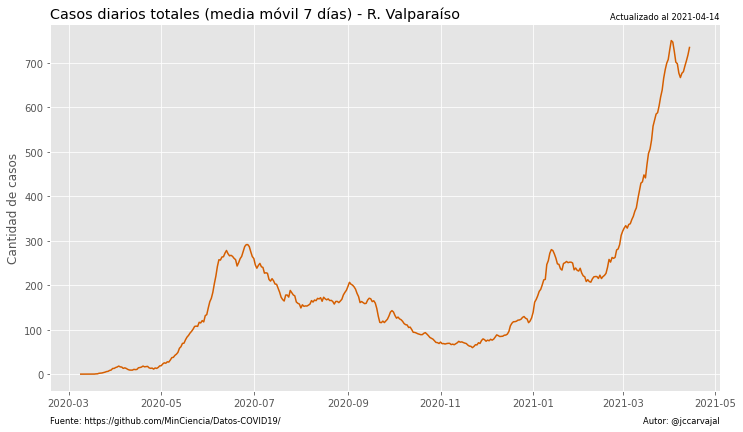

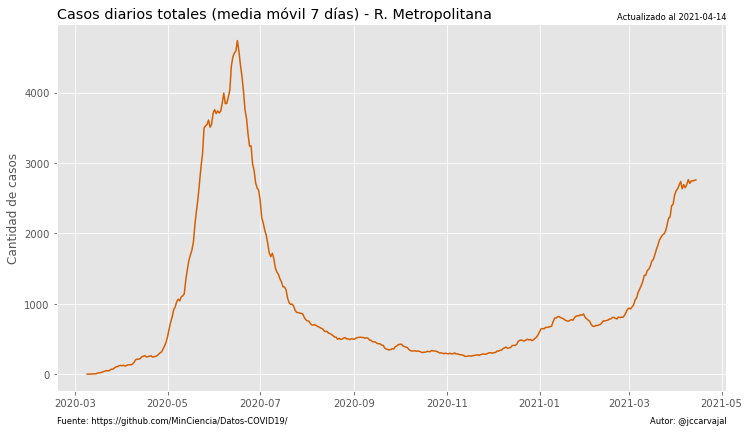

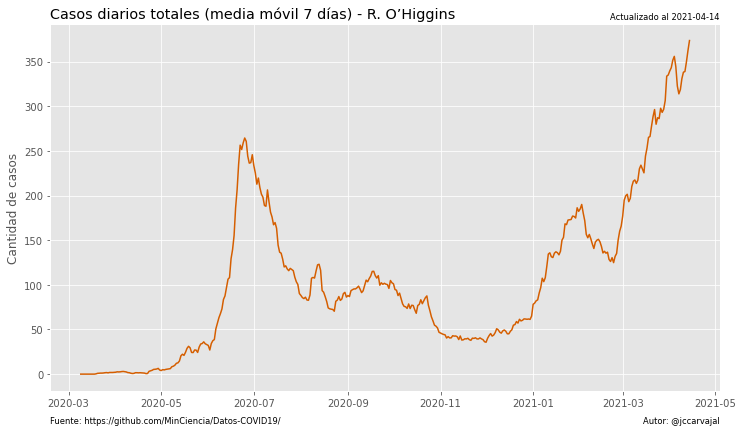

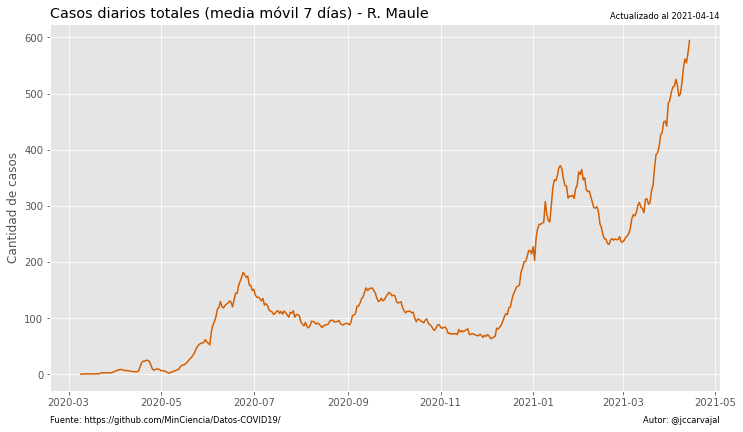

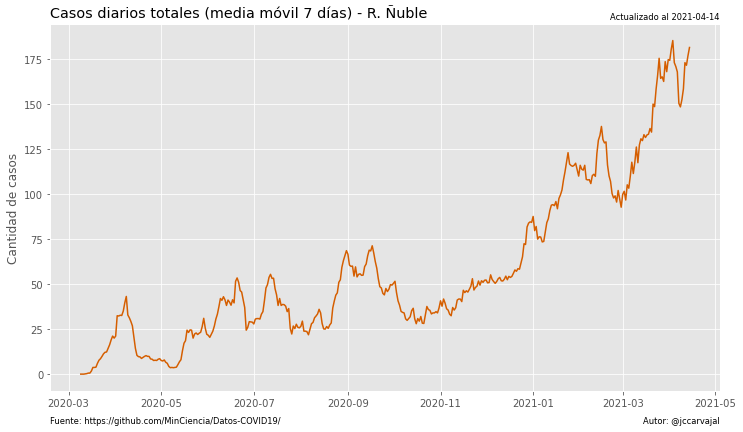

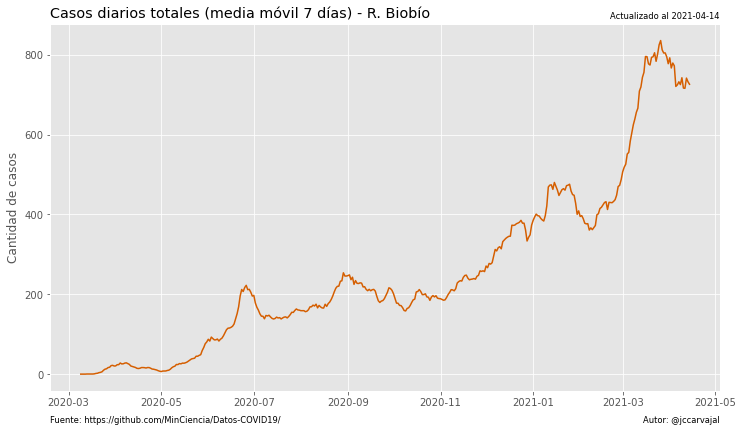

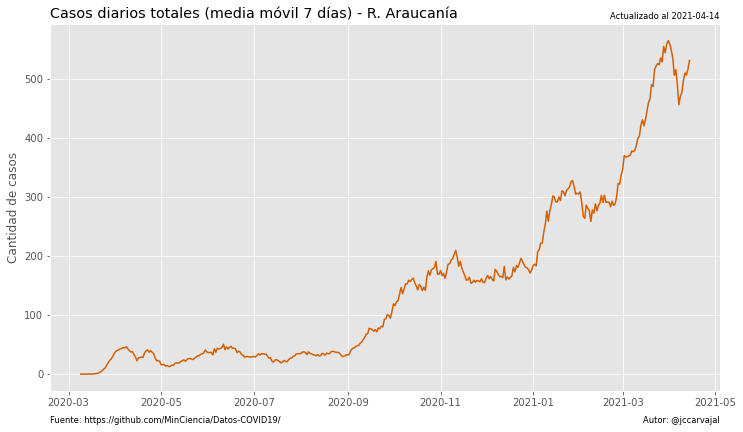

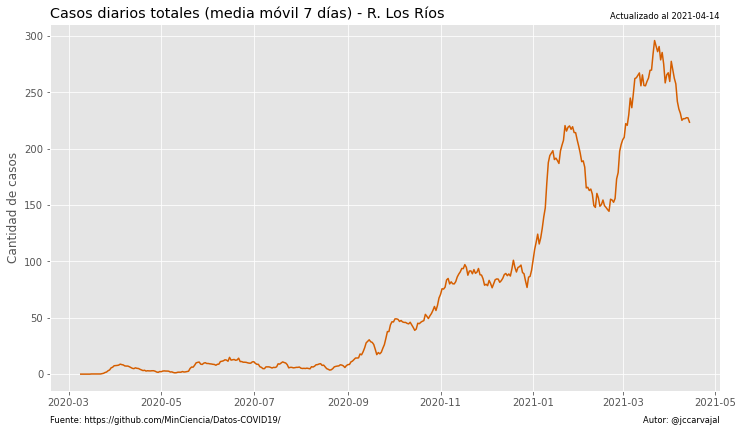

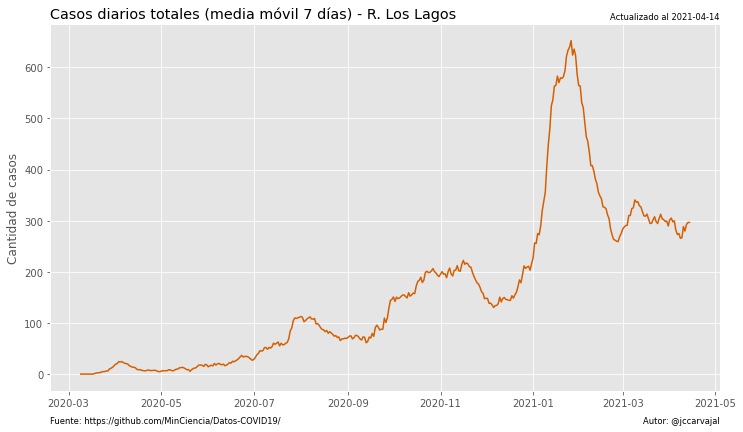

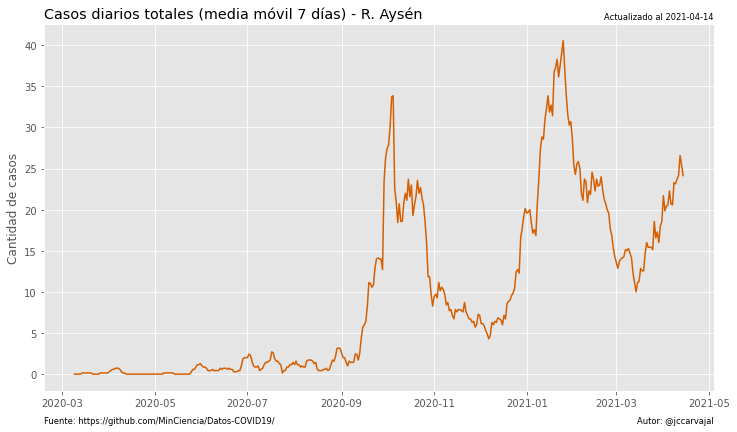

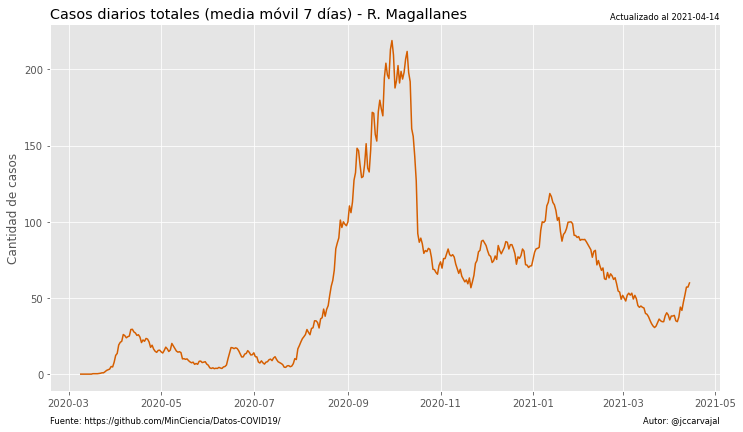

In [15]:
# Paso 3: Visualizar data
regiones = ['Arica y Parinacota','Tarapacá','Antofagasta','Atacama','Coquimbo',
            'Valparaíso','Metropolitana','O’Higgins','Maule','Ñuble','Biobío',
            'Araucanía','Los Ríos','Los Lagos','Aysén','Magallanes']
for column in dp13_edit_mm[regiones]:    
    plt.style.use('ggplot')
    plt.figure(figsize=(12,6.75))
    plt.plot(dp13_edit_mm['Fecha'], dp13_edit_mm[column], color='#D55E00')
    plt.grid(True)
    plt.title('Casos diarios totales (media móvil 7 días) - R. ' + str(column), loc='left')
    plt.ylabel('Cantidad de casos')
    plt.annotate('Actualizado al ' + str(ultima_fecha), 
                 xy=(1,1), xytext=(0,12), xycoords='axes fraction',textcoords='offset points', 
                 fontsize='small', va='top', ha='right')
    plt.annotate('Fuente: https://github.com/MinCiencia/Datos-COVID19/',
                 xy=(0,0), xytext=(0,-25), xycoords='axes fraction', textcoords='offset points',
                 fontsize='small', va='top', ha='left')
    plt.annotate('Autor: @jccarvajal',
                 xy=(1,0), xytext=(0,-25), xycoords='axes fraction', textcoords='offset points',
                 fontsize='small', va='top', ha='right')
    
    # Guardar figura en directorio
    directory = 'Covid_19_Figures'
    filename = 'DP13_Casos_Diarios_Totales_media_movil_' + str(column) + '.png'
    if not os.path.exists(directory):
        os.makedirs(directory)
    savepath = os.path.join(directory, filename)
    plt.savefig(savepath, dpi=200)
    plt.show()

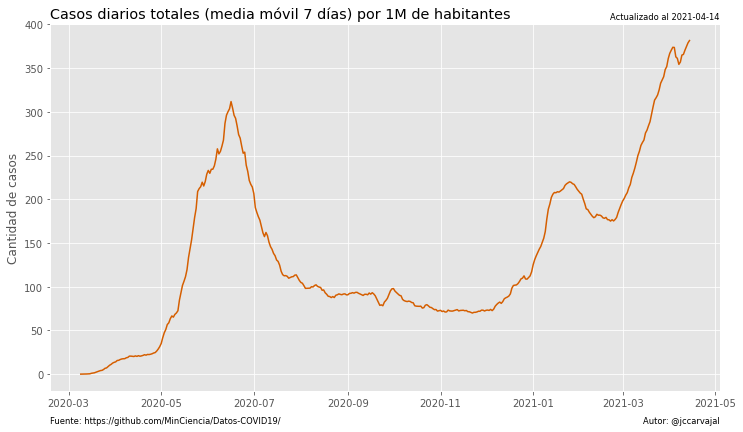

In [16]:
# Paso 3: Visualizar data
dp13_edit_pmh = dp13_edit_mm.copy()
habitantes = 19.1 #estimación en millones
dp13_edit_pmh['Nacional_PMH'] = dp13_edit_or['Nacional']/ habitantes

plt.style.use('ggplot')
plt.figure(figsize=(12,6.75))
plt.plot(dp13_edit_pmh['Fecha'], dp13_edit_pmh['Nacional_PMH'],  color='#D55E00')
plt.grid(True)
plt.title('Casos diarios totales (media móvil 7 días) por 1M de habitantes', loc='left')
plt.ylabel('Cantidad de casos')
plt.annotate('Actualizado al ' + str(ultima_fecha), 
             xy=(1,1), xytext=(0,12), xycoords='axes fraction',textcoords='offset points', 
             fontsize='small', va='top', ha='right')
plt.annotate('Fuente: https://github.com/MinCiencia/Datos-COVID19/',
             xy=(0,0), xytext=(0,-25), xycoords='axes fraction', textcoords='offset points',
             fontsize='small', va='top', ha='left')
plt.annotate('Autor: @jccarvajal',
             xy=(1,0), xytext=(0,-25), xycoords='axes fraction', textcoords='offset points',
             fontsize='small', va='top', ha='right')

# Guardar figura en directorio
directory = 'Covid_19_Figures'
filename = 'DP13_Casos_Diarios_Totales_por_millon_habitantes.png'
if not os.path.exists(directory):
    os.makedirs(directory)
savepath = os.path.join(directory, filename)
plt.savefig(savepath, dpi=200)
plt.show()

## DP07 - PCR

In [17]:
# Paso 1: Importar data
url = 'https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto7/PCR_T.csv'
dl = requests.get(url).content
dp07 = pd.read_csv(io.StringIO(dl.decode('utf-8')))
dp07.rename(columns={'Region':'Fecha'},inplace=True)
dp07_edit = dp07.drop([0,1], axis=0).reset_index(drop=True)
dp07_edit['Fecha'] = pd.to_datetime(dp07_edit['Fecha'])
#dp07_edit

In [18]:
# Paso 2: Transformar data
seleccion_regiones = ['Arica y Parinacota','Tarapacá','Antofagasta','Atacama','Coquimbo',
                      'Valparaíso','O’Higgins','Maule','Ñuble','Biobío','Araucanía',
                      'Los Ríos','Los Lagos','Aysén','Magallanes']
dp07_edit['Otras Regiones'] = dp07_edit[seleccion_regiones].sum(axis=1)

dp07_edit1_mm = dp07_edit.iloc[:, 0]
dp07_edit2_mm = dp07_edit.iloc[:, 1:18].rolling(7).mean()
dp07_edit_mm = pd.concat([dp07_edit1_mm, dp07_edit2_mm], axis=1)
dp07_edit_mm['Total'] = dp07_edit_mm.sum(axis=1)
dp07_edit_mm.tail(5)

dp07_edit_mm['Date'] = dp07_edit_mm['Fecha']
dp07_edit_mm['Date'] = dp07_edit_mm['Date'].dt.strftime('%Y-%m-%d')
ultima_fecha = dp07_edit_mm[['Date']].tail(1).iloc[0]['Date']
ultima_fecha

'2021-04-14'

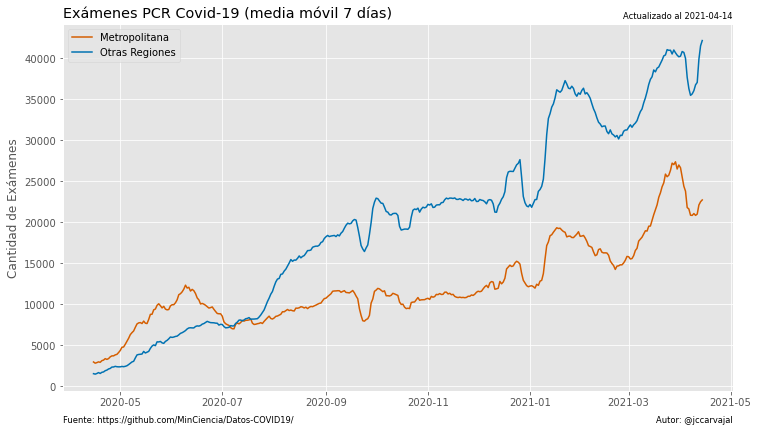

In [19]:
# Paso 3: Visualizar data
plt.style.use('ggplot')
plt.figure(figsize=(12,6.75))
plt.plot(dp07_edit_mm['Fecha'], dp07_edit_mm['Metropolitana'],  color='#D55E00')
plt.plot(dp07_edit_mm['Fecha'], dp07_edit_mm['Otras Regiones'], color='#0072B2')
plt.grid(True)
plt.legend(['Metropolitana', 'Otras Regiones'], loc='upper left')
plt.title('Exámenes PCR Covid-19 (media móvil 7 días)', loc='left')
plt.ylabel('Cantidad de Exámenes')
plt.annotate('Actualizado al ' + str(ultima_fecha), 
             xy=(1,1), xytext=(0,12), xycoords='axes fraction',textcoords='offset points', 
             fontsize='small', va='top', ha='right')
plt.annotate('Fuente: https://github.com/MinCiencia/Datos-COVID19/',
             xy=(0,0), xytext=(0,-25), xycoords='axes fraction', textcoords='offset points',
             fontsize='small', va='top', ha='left')
plt.annotate('Autor: @jccarvajal',
             xy=(1,0), xytext=(0,-25), xycoords='axes fraction', textcoords='offset points',
             fontsize='small', va='top', ha='right')

# Guardar figura en directorio
directory = 'Covid_19_Figures'
filename = 'DP07_Exámenes_PCR.png'
if not os.path.exists(directory):
    os.makedirs(directory)
savepath = os.path.join(directory, filename)
plt.savefig(savepath, dpi=200)
plt.show()

## DP37 - Defunciones por COVID en Chile

In [20]:
# Paso 1: Importar data
url = 'https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto37/Defunciones_deis_std.csv'
dl = requests.get(url).content
#dp37 = pd.read_csv(io.StringIO(dl.decode('utf-8')), decimal=',', thousands='.')
dp37 = pd.read_csv(io.StringIO(dl.decode('utf-8')))
dp37 = dp37.loc[(dp37['Fecha'] != 'en verificación')]
dp37['Fecha'] = pd.to_datetime(dp37['Fecha'])

In [21]:
# Paso 2: Transformar data
dp37_e1 = dp37.loc[(dp37['Serie'] == 'sospechosos')]
most_recent_date_pub = dp37_e1['Publicacion'].max()
dp37_e11 = dp37_e1.loc[(dp37_e1['Publicacion'] == most_recent_date_pub)]
dp37_e11 = dp37_e11[['Fecha', 'Numero defunciones']].reset_index(drop=True)
dp37_e11.rename(columns={'Numero defunciones':'Sospechosos'},inplace=True)

dp37_e2 = dp37.loc[(dp37['Serie'] == 'confirmados')]
most_recent_date_cnf = dp37_e2['Publicacion'].max()
dp37_e22 = dp37_e2.loc[(dp37_e2['Publicacion'] == most_recent_date_cnf)]
dp37_e22 = dp37_e22[['Fecha', 'Numero defunciones']].reset_index(drop=True)
dp37_e22.rename(columns={'Numero defunciones':'Confirmados'},inplace=True)

dp37_f = pd.merge(dp37_e11, dp37_e22, on=['Fecha'])
dp37_f['Confirmados y sospechosos'] = dp37_f['Confirmados'] + dp37_f['Sospechosos']
ultima_fecha = most_recent_date_cnf

dp37_f_mm_1 = dp37_f.iloc[:, 0]
dp37_f_mm_2 = dp37_f.iloc[:, 1:4].rolling(7).mean()
dp37_f_mm = pd.concat([dp37_f_mm_1, dp37_f_mm_2], axis=1)

total_sosp = dp37_e11['Sospechosos'].sum().astype(int)
total_conf = dp37_e22['Confirmados'].sum().astype(int)
total_conf_sosp = total_conf + total_sosp

dp37_f.tail(9)

,Fecha,Sospechosos,Confirmados,Confirmados y sospechosos
383,2021-04-03,38,94,132
384,2021-04-04,23,109,132
385,2021-04-05,16,104,120
386,2021-04-06,10,88,98
387,2021-04-07,2,86,88
388,2021-04-08,0,109,109
389,2021-04-09,0,49,49
390,2021-04-10,0,25,25
391,2021-04-11,0,2,2


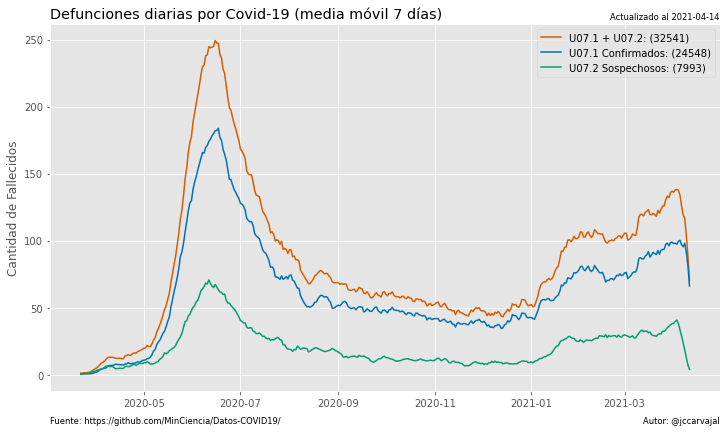

In [22]:
# Paso 3: Visualizar data
plt.style.use('ggplot')
plt.figure(figsize=(12,6.75))
plt.plot(dp37_f_mm['Fecha'], dp37_f_mm['Confirmados y sospechosos'], color='#D55E00')
plt.plot(dp37_f_mm['Fecha'], dp37_f_mm['Confirmados'], color='#0072B2')
plt.plot(dp37_f_mm['Fecha'], dp37_f_mm['Sospechosos'], color='#009E73')
plt.grid(True)
plt.legend(['U07.1 + U07.2: (' + str(total_conf_sosp) + ')',
            'U07.1 Confirmados: (' + str(total_conf) + ')',
            'U07.2 Sospechosos: (' + str(total_sosp) + ')'], loc='upper right')
plt.title('Defunciones diarias por Covid-19 (media móvil 7 días)', loc='left')
plt.ylabel('Cantidad de Fallecidos')
plt.annotate('Actualizado al ' + str(ultima_fecha), 
             xy=(1,1), xytext=(0,12), xycoords='axes fraction',textcoords='offset points', 
             fontsize='small', va='top', ha='right')
plt.annotate('Fuente: https://github.com/MinCiencia/Datos-COVID19/',
             xy=(0,0), xytext=(0,-25), xycoords='axes fraction', textcoords='offset points',
             fontsize='small', va='top', ha='left')
plt.annotate('Autor: @jccarvajal',
             xy=(1,0), xytext=(0,-25), xycoords='axes fraction', textcoords='offset points',
             fontsize='small', va='top', ha='right')

# Guardar figura en directorio
directory = 'Covid_19_Figures'
filename = 'DP37_Defunciones_Covid_confirmados_sospechosos.png'
if not os.path.exists(directory):
    os.makedirs(directory)
savepath = os.path.join(directory, filename)
plt.savefig(savepath, dpi=200)
plt.show()

In [23]:
# Paso 2: Transformar data
dp37_e1 = dp37.loc[(dp37['Serie'] == 'sospechosos')]
most_recent_date_pub = dp37_e1['Publicacion'].max()
dp37_e11 = dp37_e1.loc[(dp37_e1['Publicacion'] == most_recent_date_pub)]
dp37_e11 = dp37_e11[['Fecha', 'Numero defunciones']].reset_index(drop=True)
dp37_e11.rename(columns={'Numero defunciones':'Sospechosos'},inplace=True)

dp37_e2 = dp37.loc[(dp37['Serie'] == 'confirmados')]
most_recent_date_cnf = dp37_e2['Publicacion'].max()
dp37_e22 = dp37_e2.loc[(dp37_e2['Publicacion'] == most_recent_date_cnf)]
dp37_e22 = dp37_e22[['Fecha', 'Numero defunciones']].reset_index(drop=True)
dp37_e22.rename(columns={'Numero defunciones':'Confirmados'},inplace=True)

dp37_f = pd.merge(dp37_e11, dp37_e22, on=['Fecha'])
dp37_f['Confirmados y sospechosos'] = dp37_f['Confirmados'] + dp37_f['Sospechosos']
ultima_fecha = most_recent_date_cnf

dp37_mes = dp37_f.groupby(pd.Grouper(key='Fecha', freq='1M')).sum()
dp37_mes.index = dp37_mes.index.strftime('%Y-%m')
dp37_mes.tail(4)

,Sospechosos,Confirmados,Confirmados y sospechosos
Fecha,,,
2021-01,643,1996,2639
2021-02,790,2102,2892
2021-03,994,2777,3771
2021-04,166,853,1019


<Figure size 864x486 with 0 Axes>

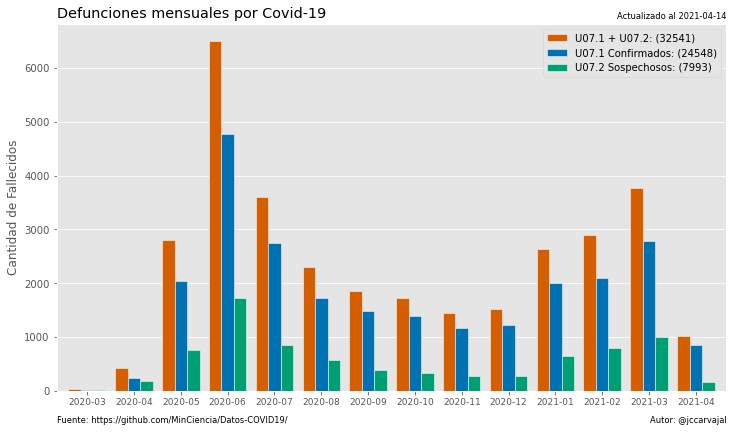

In [24]:
# Paso 3: Visualizar data
plt.style.use('ggplot')
plt.figure(figsize=(12,6.75))
colores = ('#D55E00','#0072B2','#009E73')
dp37_mes[['Confirmados y sospechosos',
          'Confirmados','Sospechosos']].plot(kind='bar', rot=0, align='center', width=0.8, edgecolor='white',
                                             color=colores, stacked=False, figsize=(12,6.75))
plt.xticks(size = 9)
plt.grid(axis='x')

plt.legend(['U07.1 + U07.2: (' + str(total_conf_sosp) + ')',
            'U07.1 Confirmados: (' + str(total_conf) + ')',
            'U07.2 Sospechosos: (' + str(total_sosp) + ')'], loc='upper right')
plt.title('Defunciones mensuales por Covid-19', loc='left')
plt.xlabel('')
plt.ylabel('Cantidad de Fallecidos')
plt.annotate('Actualizado al ' + str(ultima_fecha), 
             xy=(1,1), xytext=(0,12), xycoords='axes fraction',textcoords='offset points', 
             fontsize='small', va='top', ha='right')
plt.annotate('Fuente: https://github.com/MinCiencia/Datos-COVID19/',
             xy=(0,0), xytext=(0,-25), xycoords='axes fraction', textcoords='offset points',
             fontsize='small', va='top', ha='left')
plt.annotate('Autor: @jccarvajal',
             xy=(1,0), xytext=(0,-25), xycoords='axes fraction', textcoords='offset points',
             fontsize='small', va='top', ha='right')

# Guardar figura en directorio
directory = 'Covid_19_Figures'
filename = 'DP37_Defunciones_Covid_confirmados_sospechosos_mensual.png'
if not os.path.exists(directory):
    os.makedirs(directory)
savepath = os.path.join(directory, filename)
plt.savefig(savepath, dpi=200)
plt.show()

## Tasa de Positividad

In [25]:
# Paso 1: Importar data
#Data viene de DP07 (Exámenes PCR) y DP13 (Casos diarios totales)

In [26]:
# Paso 2: Transformar data

#Exámenes PCR
dp07_edit_tp = dp07_edit_mm[['Fecha', 'Metropolitana', 'Otras Regiones']].reset_index(drop=True)
dp07_edit_tp.rename(columns={'Metropolitana':'Metropolitana PCR',
                             'Otras Regiones':'Otras Regiones PCR'},inplace=True)
#Casos diarios
dp13_edit_tp = dp13_edit_or[['Fecha', 'Metropolitana', 'Otras Regiones']].reset_index(drop=True)
dp13_edit_tp.rename(columns={'Metropolitana':'Metropolitana Casos',
                             'Otras Regiones':'Otras Regiones Casos'},inplace=True)

positividad = pd.merge(dp07_edit_tp, dp13_edit_tp, on=['Fecha'])
positividad['Metropolitana'] = 100 * (positividad['Metropolitana Casos'] / positividad['Metropolitana PCR'])
positividad['Otras Regiones'] = 100 * (positividad['Otras Regiones Casos'] / positividad['Otras Regiones PCR'])

#TP = dp13_edit_tp / dp07_edit_tp 

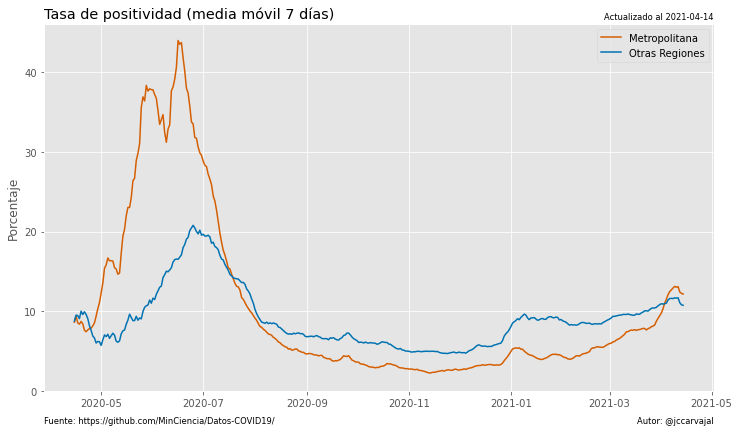

In [27]:
# Paso 3: Visualizar data
plt.style.use('ggplot')
plt.figure(figsize=(12,6.75))
plt.plot(positividad['Fecha'], positividad['Metropolitana'],  color='#D55E00')
plt.plot(positividad['Fecha'], positividad['Otras Regiones'], color='#0072B2')
plt.ylim(ymin=0)
plt.grid(True)
plt.legend(['Metropolitana', 'Otras Regiones'], loc='upper right')
plt.title('Tasa de positividad (media móvil 7 días)', loc='left')
plt.ylabel('Porcentaje')
plt.annotate('Actualizado al ' + str(ultima_fecha), 
             xy=(1,1), xytext=(0,12), xycoords='axes fraction',textcoords='offset points', 
             fontsize='small', va='top', ha='right')
plt.annotate('Fuente: https://github.com/MinCiencia/Datos-COVID19/',
             xy=(0,0), xytext=(0,-25), xycoords='axes fraction', textcoords='offset points',
             fontsize='small', va='top', ha='left')
plt.annotate('Autor: @jccarvajal',
             xy=(1,0), xytext=(0,-25), xycoords='axes fraction', textcoords='offset points',
             fontsize='small', va='top', ha='right')

# Guardar figura en directorio
directory = 'Covid_19_Figures'
filename = 'Tasa Positividad_Covid_19_Regiones.png'
if not os.path.exists(directory):
    os.makedirs(directory)
savepath = os.path.join(directory, filename)
plt.savefig(savepath, dpi=200)
plt.show()

Desde Noviembre 2020

In [28]:
# Paso 2: Transformar data
positividad['Date'] = positividad['Fecha']
positividad['Date'] = positividad['Date'].dt.strftime('%Y-%m-%d')
end_date = positividad[['Date']].tail(1).iloc[0]['Date']
end_date

start_date = '2020-11-01'
#end_date = '2021-03-27'

after_start_date  = positividad["Fecha"] >= start_date
before_end_date   = positividad["Fecha"] <= end_date
between_two_dates = after_start_date & before_end_date
positividad_filtrada = positividad.loc[between_two_dates]
positividad_filtrada.tail(3)

,Fecha,Metropolitana PCR,Otras Regiones PCR,Metropolitana Casos,Otras Regiones Casos,Metropolitana,Otras Regiones,Date
368,2021-04-12,22104.000000,39867.571429,2745.000000,4412.571429,12.418567,11.068072,2021-04-12
369,2021-04-13,22502.285714,41512.142857,2753.000000,4483.714286,12.234313,10.800970,2021-04-13
370,2021-04-14,22720.142857,42156.285714,2760.571429,4527.285714,12.150326,10.739290,2021-04-14


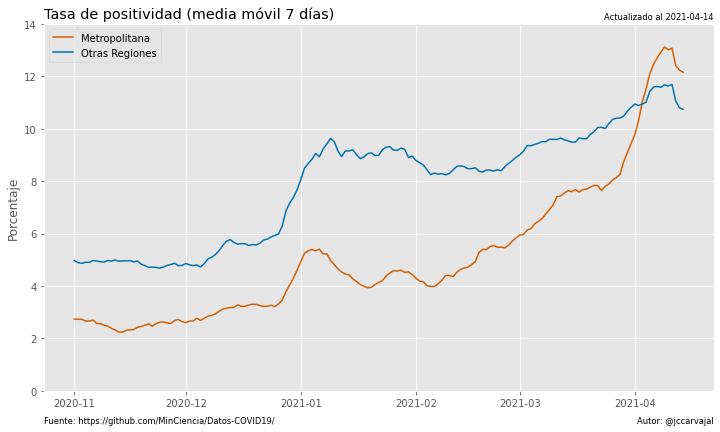

In [29]:
# Paso 3: Visualizar data
plt.style.use('ggplot')
plt.figure(figsize=(12,6.75))
plt.plot(positividad_filtrada['Fecha'], positividad_filtrada['Metropolitana'],  color='#D55E00')
plt.plot(positividad_filtrada['Fecha'], positividad_filtrada['Otras Regiones'], color='#0072B2')
plt.ylim(ymin=0)
plt.ylim(ymax=14)
plt.grid(True)
plt.legend(['Metropolitana', 'Otras Regiones'], loc='upper left')
plt.title('Tasa de positividad (media móvil 7 días)', loc='left')
plt.ylabel('Porcentaje')
plt.annotate('Actualizado al ' + str(end_date), 
             xy=(1,1), xytext=(0,12), xycoords='axes fraction',textcoords='offset points', 
             fontsize='small', va='top', ha='right')
plt.annotate('Fuente: https://github.com/MinCiencia/Datos-COVID19/',
             xy=(0,0), xytext=(0,-25), xycoords='axes fraction', textcoords='offset points',
             fontsize='small', va='top', ha='left')
plt.annotate('Autor: @jccarvajal',
             xy=(1,0), xytext=(0,-25), xycoords='axes fraction', textcoords='offset points',
             fontsize='small', va='top', ha='right')

# Guardar figura en directorio
directory = 'Covid_19_Figures'
filename = 'Tasa Positividad_Covid_19_Regiones_Acercamiento.png'
if not os.path.exists(directory):
    os.makedirs(directory)
savepath = os.path.join(directory, filename)
plt.savefig(savepath, dpi=200)
plt.show()

## DP20 - Ventiladores Disponibles/Ocupados

In [30]:
# Paso 1: Importar data
url = 'https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto20/NumeroVentiladores_T.csv'
dl = requests.get(url).content
dp20 = pd.read_csv(io.StringIO(dl.decode('utf-8')))
dp20.rename(columns={'Ventiladores':'Fecha', 'total':'Total', 
                     'disponibles':'Disponibles', 'ocupados':'Ocupados'},inplace=True)
dp20_edit = dp20.drop([0,1], axis=0).reset_index(drop=True)

reemplazos = ((['2020-09-30', 252.0, 0, 2067.0],   ['2020-09-30', 2524, 457, 2067]),
              (['2020-12-30', 2166, 2524.0, 1914], ['2020-12-30', 2166, 252, 1914]))
dp20_edit.replace(reemplazos,inplace=True)

dp20_edit['Fecha'] = pd.to_datetime(dp20_edit['Fecha'])
#dp20_edit['Disponibles'].max()

In [31]:
# Paso 2: Transformar data
dp20_edit['Date'] = dp20_edit['Fecha']
dp20_edit['Date'] = dp20_edit['Date'].dt.strftime('%Y-%m-%d')
ultima_fecha = dp20_edit[['Date']].tail(1).iloc[0]['Date']
ultima_fecha

'2021-04-14'

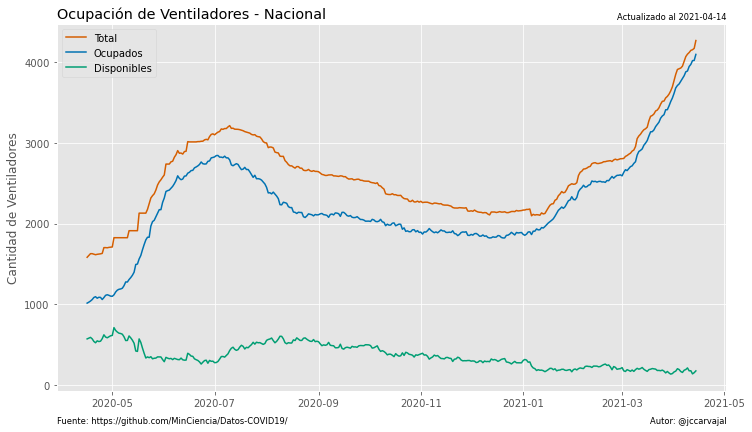

In [32]:
# Paso 3: Visualizar data
plt.style.use('ggplot')
plt.figure(figsize=(12,6.75))
plt.plot(dp20_edit['Fecha'], dp20_edit['Total'],  color='#D55E00')
plt.plot(dp20_edit['Fecha'], dp20_edit['Ocupados'], color='#0072B2')
plt.plot(dp20_edit['Fecha'], dp20_edit['Disponibles'], color='#009E73')
plt.grid(True)
plt.legend(['Total', 'Ocupados','Disponibles'], loc='upper left')
plt.title('Ocupación de Ventiladores - Nacional', loc='left')
plt.ylabel('Cantidad de Ventiladores')
plt.annotate('Actualizado al ' + str(ultima_fecha), 
             xy=(1,1), xytext=(0,12), xycoords='axes fraction',textcoords='offset points', 
             fontsize='small', va='top', ha='right')
plt.annotate('Fuente: https://github.com/MinCiencia/Datos-COVID19/',
             xy=(0,0), xytext=(0,-25), xycoords='axes fraction', textcoords='offset points',
             fontsize='small', va='top', ha='left')
plt.annotate('Autor: @jccarvajal',
             xy=(1,0), xytext=(0,-25), xycoords='axes fraction', textcoords='offset points',
             fontsize='small', va='top', ha='right')

# Guardar figura en directorio
directory = 'Covid_19_Figures'
filename = 'DP20_Ocupacion_Ventiladores.png'
if not os.path.exists(directory):
    os.makedirs(directory)
savepath = os.path.join(directory, filename)
plt.savefig(savepath, dpi=200)
plt.show()

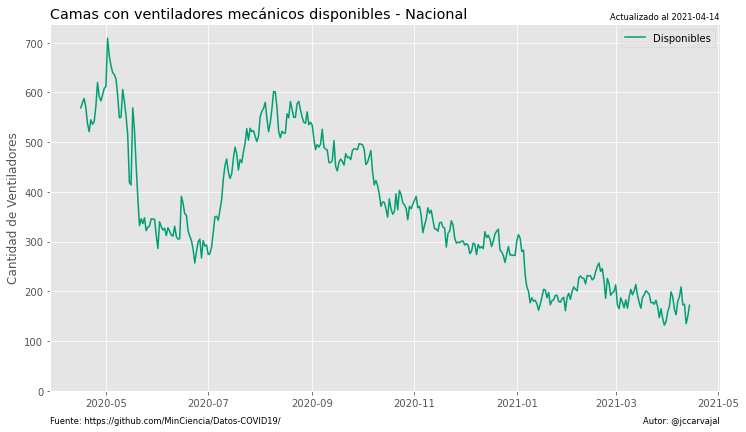

In [33]:
# Paso 3: Visualizar data
plt.style.use('ggplot')
plt.figure(figsize=(12,6.75))
plt.plot(dp20_edit['Fecha'], dp20_edit['Disponibles'], color='#009E73')
plt.ylim(ymin=0)
plt.grid(True)
plt.legend(['Disponibles'], loc='upper right')
plt.title('Camas con ventiladores mecánicos disponibles - Nacional', loc='left')
plt.ylabel('Cantidad de Ventiladores')
plt.annotate('Actualizado al ' + str(ultima_fecha), 
             xy=(1,1), xytext=(0,12), xycoords='axes fraction',textcoords='offset points', 
             fontsize='small', va='top', ha='right')
plt.annotate('Fuente: https://github.com/MinCiencia/Datos-COVID19/',
             xy=(0,0), xytext=(0,-25), xycoords='axes fraction', textcoords='offset points',
             fontsize='small', va='top', ha='left')
plt.annotate('Autor: @jccarvajal',
             xy=(1,0), xytext=(0,-25), xycoords='axes fraction', textcoords='offset points',
             fontsize='small', va='top', ha='right')

# Guardar figura en directorio
directory = 'Covid_19_Figures'
filename = 'DP20_Ventiladores_Disponibles.png'
if not os.path.exists(directory):
    os.makedirs(directory)
savepath = os.path.join(directory, filename)
plt.savefig(savepath, dpi=200)
plt.show()

## DP24 - Hospitalización de pacientes COVID-19 en sistema integrado

In [34]:
# Paso 1: Importar data
url = 'https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto24/CamasHospital_Diario_T.csv'
dl = requests.get(url).content
dp24 = pd.read_csv(io.StringIO(dl.decode('utf-8')))
dp24.rename(columns={'Tipo de cama':'Fecha'},inplace=True)
dp24_edit = dp24.drop([0,1], axis=0).reset_index(drop=True)
dp24_edit['Fecha'] = pd.to_datetime(dp24_edit['Fecha'])
dp24_edit.tail(1)

,Fecha,Basica,Media,UTI,UCI
361,2021-04-14,1898,1850,1299,3271


In [35]:
# Paso 2: Transformar data
total_hospitalizaciones = ['Basica','Media','UTI','UCI']
dp24_edit['Hospitalizaciones'] = dp24_edit[total_hospitalizaciones].sum(axis=1)

dp24_edit['Date'] = dp24_edit['Fecha']
dp24_edit['Date'] = dp24_edit['Date'].dt.strftime('%Y-%m-%d')
ultima_fecha = dp24_edit[['Date']].tail(1).iloc[0]['Date']
ultima_fecha

'2021-04-14'

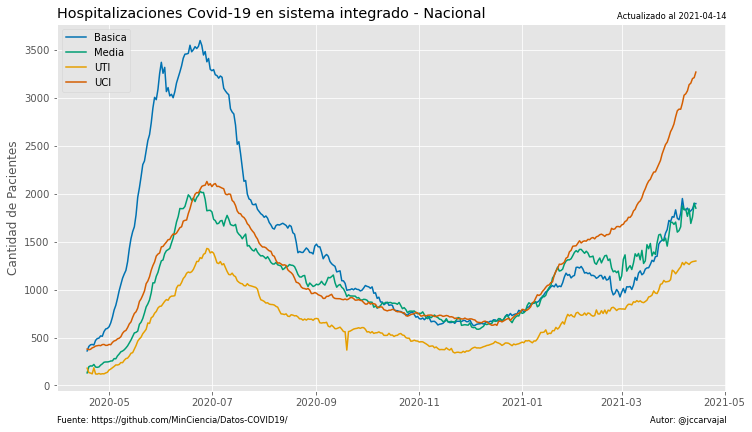

In [36]:
# Paso 3: Visualizar data
plt.style.use('ggplot')
plt.figure(figsize=(12,6.75))
plt.plot(dp24_edit['Fecha'], dp24_edit['Basica'], color='#0072B2')
plt.plot(dp24_edit['Fecha'], dp24_edit['Media'], color='#009E73')
plt.plot(dp24_edit['Fecha'], dp24_edit['UTI'], color='#E69F00')
plt.plot(dp24_edit['Fecha'], dp24_edit['UCI'], color='#D55E00')
plt.grid(True)
plt.legend(['Basica', 'Media','UTI','UCI'], loc='upper left')
plt.title('Hospitalizaciones Covid-19 en sistema integrado - Nacional', loc='left')
plt.ylabel('Cantidad de Pacientes')
plt.annotate('Actualizado al ' + str(ultima_fecha), 
             xy=(1,1), xytext=(0,12), xycoords='axes fraction', textcoords='offset points', 
             fontsize='small', va='top', ha='right')
plt.annotate('Fuente: https://github.com/MinCiencia/Datos-COVID19/',
             xy=(0,0), xytext=(0,-25), xycoords='axes fraction', textcoords='offset points',
             fontsize='small', va='top', ha='left')
plt.annotate('Autor: @jccarvajal',
             xy=(1,0), xytext=(0,-25), xycoords='axes fraction', textcoords='offset points',
             fontsize='small', va='top', ha='right')

# Guardar figura en directorio
directory = 'Covid_19_Figures'
filename = 'DP24_Hospitalizaciones.png'
if not os.path.exists(directory):
    os.makedirs(directory)
savepath = os.path.join(directory, filename)
plt.savefig(savepath, dpi=200)
plt.show()

## Ventiladores Disponibles/Ocupados y Pacientes UCI


In [37]:
# Paso 2: Transformar data
hospitalizaciones = pd.merge(dp20_edit, dp24_edit, on=['Fecha'])
hospitalizaciones['Date'] = hospitalizaciones['Fecha']
hospitalizaciones['Date'] = hospitalizaciones['Date'].dt.strftime('%Y-%m-%d')
ultima_fecha = hospitalizaciones[['Date']].tail(1).iloc[0]['Date']
ultima_fecha

'2021-04-14'

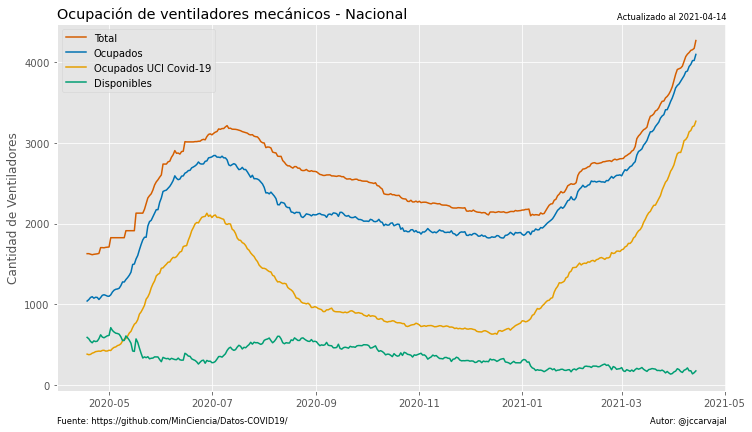

In [38]:
# Paso 3: Visualizar data
plt.style.use('ggplot')
plt.figure(figsize=(12,6.75))
plt.plot(hospitalizaciones['Fecha'], hospitalizaciones['Total'],  color='#D55E00')
plt.plot(hospitalizaciones['Fecha'], hospitalizaciones['Ocupados'], color='#0072B2')
plt.plot(hospitalizaciones['Fecha'], hospitalizaciones['UCI'], color='#E69F00')
plt.plot(hospitalizaciones['Fecha'], hospitalizaciones['Disponibles'], color='#009E73')
plt.grid(True)
plt.legend(['Total', 'Ocupados','Ocupados UCI Covid-19','Disponibles'], loc='upper left')
plt.title('Ocupación de ventiladores mecánicos - Nacional', loc='left')
plt.ylabel('Cantidad de Ventiladores')
plt.annotate('Actualizado al ' + str(ultima_fecha), 
             xy=(1,1), xytext=(0,12), xycoords='axes fraction',textcoords='offset points', 
             fontsize='small', va='top', ha='right')
plt.annotate('Fuente: https://github.com/MinCiencia/Datos-COVID19/',
             xy=(0,0), xytext=(0,-25), xycoords='axes fraction', textcoords='offset points',
             fontsize='small', va='top', ha='left')
plt.annotate('Autor: @jccarvajal',
             xy=(1,0), xytext=(0,-25), xycoords='axes fraction', textcoords='offset points',
             fontsize='small', va='top', ha='right')

# Guardar figura en directorio
directory = 'Covid_19_Figures'
filename = 'Ocupacion_Ventiladores_Covid.png'
if not os.path.exists(directory):
    os.makedirs(directory)
savepath = os.path.join(directory, filename)
plt.savefig(savepath, dpi=200)
plt.show()

## DP1 - Casos totales por comuna 

In [39]:
# Paso 1: Importar data
url = 'https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto1/Covid-19_T.csv'
dl = requests.get(url).content
dp01 = pd.read_csv(io.StringIO(dl.decode('utf-8')))
dp01_edit = dp01.drop([0,2,3], axis=0).reset_index(drop=True)

#Reemplaza nombre de columna con dato en primera fila
new_header = dp01_edit.iloc[0]
dp01_edit = dp01_edit[1:]
dp01_edit.columns = new_header

dp01_edit.rename(columns={'Comuna':'Fecha'},inplace=True)
dp01_edit = dp01_edit.loc[dp01_edit['Fecha'] != 'Tasa'].reset_index(drop=True)
dp01_edit['Fecha'] = pd.to_datetime(dp01_edit['Fecha'])

In [40]:
# Paso 2: Transformar data
dp01_edit_t = dp01_edit.iloc[:, 1:363].apply(pd.to_numeric)
dp01_edit1_mm = dp01_edit.iloc[:, 0]
dp01_edit2_mm = dp01_edit_t.iloc[:, 1:363].diff()
dp01_edit_mm = pd.concat([dp01_edit1_mm, dp01_edit2_mm], axis=1)
#dp01_edit_mm.tail(1)

dp01_edit_mm['Dias'] = dp01_edit_mm['Fecha'].diff().astype('timedelta64[D]')
widths = dp01_edit_mm['Dias'].shift(0)

dp01_edit_mm['Date'] = dp01_edit_mm['Fecha']
dp01_edit_mm['Date'] = dp01_edit_mm['Date'].dt.strftime('%Y-%m-%d')
ultima_fecha = dp01_edit_mm[['Date']].tail(1).iloc[0]['Date']
ultima_fecha

'2021-04-09'

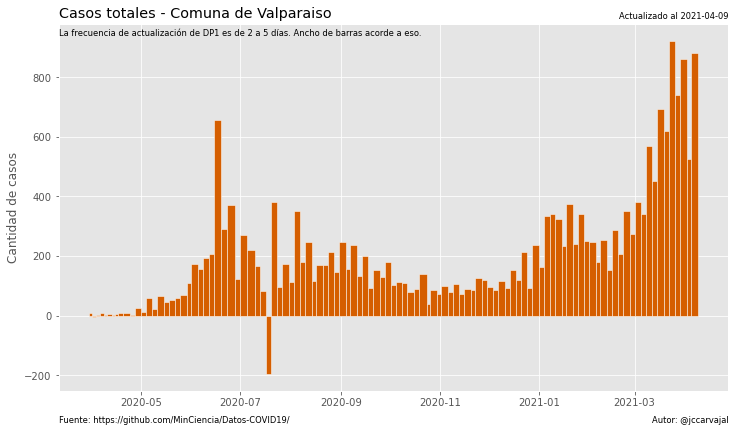

In [41]:
# Paso 3: Visualizar data

#De acuerdo a DP1 la frecuencia de actualización es cada 2 a 3 días.

#Acá ingresar la comuna que se busca (sin tildes ni símbolos)
nombre_comuna = 'Valparaiso'

plt.style.use('ggplot')
plt.figure(figsize=(12,6.75))
plt.bar(dp01_edit_mm['Fecha'], dp01_edit_mm[nombre_comuna], align='edge',
        color='#D55E00', width=-widths, edgecolor='white')
plt.grid(True)
plt.title('Casos totales - Comuna de ' + str(nombre_comuna), loc='left')
plt.ylabel('Cantidad de casos')

plt.annotate('La frecuencia de actualización de DP1 es de 2 a 5 días. Ancho de barras acorde a eso.', 
             xy=(0,1), xytext=(0,-12), xycoords='axes fraction',textcoords='offset points', 
             fontsize='small')
plt.annotate('Actualizado al ' + str(ultima_fecha), 
             xy=(1,1), xytext=(0,12), xycoords='axes fraction',textcoords='offset points', 
             fontsize='small', va='top', ha='right')
plt.annotate('Fuente: https://github.com/MinCiencia/Datos-COVID19/',
             xy=(0,0), xytext=(0,-25), xycoords='axes fraction', textcoords='offset points',
             fontsize='small', va='top', ha='left')
plt.annotate('Autor: @jccarvajal',
             xy=(1,0), xytext=(0,-25), xycoords='axes fraction', textcoords='offset points',
             fontsize='small', va='top', ha='right')

# Guardar figura en directorio
directory = 'Covid_19_Figures'
filename = 'DP01_Casos_Totales_media_movil_' + str(nombre_comuna) + '.png'
if not os.path.exists(directory):
    os.makedirs(directory)
savepath = os.path.join(directory, filename)
plt.savefig(savepath, dpi=200)
plt.show()

Ese dato negativo es del 20 de julio. ¿Qué diantres pasó?

## DP76 - Avance en Campaña de Vacunación COVID-19

In [42]:
# Paso 1: Importar data
url = 'https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto76/vacunacion_t.csv'
dl = requests.get(url).content
dp76 = pd.read_csv(io.StringIO(dl.decode('utf-8')))
dp76_edit = dp76[['Region', 'Total','Total.1']]

#Reemplaza nombre de columna con dato en primera fila
new_header = dp76_edit.iloc[0]
dp76_edit = dp76_edit[1:]
dp76_edit.columns = new_header

In [43]:
# Paso 2: Transformar data
dp76_edit.rename(columns={'Dosis':'Fecha'},inplace=True)
dp76_edit['Fecha']   = pd.to_datetime(dp76_edit['Fecha'])
dp76_edit['Primera'] = dp76_edit['Primera'].apply(pd.to_numeric)
dp76_edit['Segunda'] = dp76_edit['Segunda'].apply(pd.to_numeric)

habitantes = 19458310

dp76_edit['Primera_100'] = 100 * (dp76_edit['Primera'] / habitantes)
dp76_edit['Segunda_100'] = 100 * (dp76_edit['Segunda'] / habitantes)

dp76_edit.tail(1)

,Fecha,Primera,Segunda,Primera_100,Segunda_100
112,2021-04-14,7600908.0,5126051.0,39.062529,26.343763


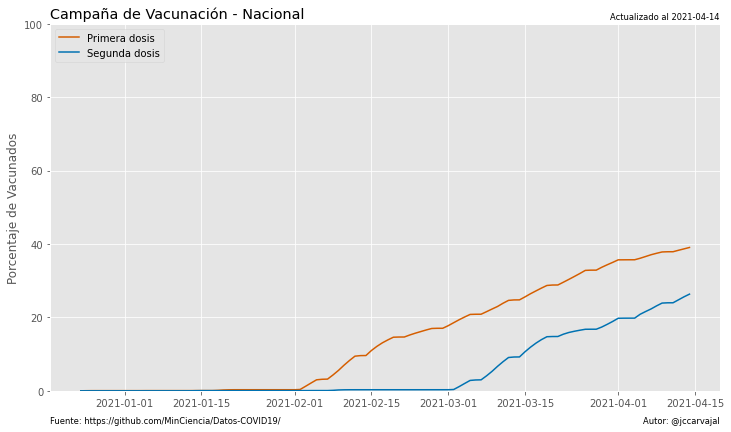

In [44]:
# Paso 3: Visualizar data
plt.style.use('ggplot')
plt.figure(figsize=(12,6.75))
plt.plot(dp76_edit['Fecha'], dp76_edit['Primera_100'], color='#D55E00')
plt.plot(dp76_edit['Fecha'], dp76_edit['Segunda_100'], color='#0072B2')
plt.ylim(ymin=0)
plt.ylim(ymax=100)
plt.grid(True)

plt.legend(['Primera dosis', 'Segunda dosis'], loc='upper left')
plt.title('Campaña de Vacunación - Nacional', loc='left')
plt.ylabel('Porcentaje de Vacunados')
plt.annotate('Actualizado al ' + str(end_date), 
             xy=(1,1), xytext=(0,12), xycoords='axes fraction',textcoords='offset points', 
             fontsize='small', va='top', ha='right')
plt.annotate('Fuente: https://github.com/MinCiencia/Datos-COVID19/',
             xy=(0,0), xytext=(0,-25), xycoords='axes fraction', textcoords='offset points',
             fontsize='small', va='top', ha='left')
plt.annotate('Autor: @jccarvajal',
             xy=(1,0), xytext=(0,-25), xycoords='axes fraction', textcoords='offset points',
             fontsize='small', va='top', ha='right')

# Guardar figura en directorio
directory = 'Covid_19_Figures'
filename = 'Campaña_Vacunacion_Nacional.png'
if not os.path.exists(directory):
    os.makedirs(directory)
savepath = os.path.join(directory, filename)
plt.savefig(savepath, dpi=200)
plt.show()

## Casos, hospitalizaciones y defunciones

In [45]:
# Paso 1: Importar data
# Data viene de DP13 (Casos diarios totales), DP24 (Hospitalización de pacientes) y DP37 (Defunciones)

In [46]:
# Paso 2: Transformar data

#Casos diarios
casos_diarios_nacional = dp13_edit_nac[['Fecha', 'Nacional']].reset_index(drop=True)

#Hospitalizaciones
#hospitalizaciones_uci = hospitalizaciones[['Fecha', 'UCI']].reset_index(drop=True)
#hospitalizaciones_uci_mm1 = hospitalizaciones_uci.iloc[:, 0]
#hospitalizaciones_uci_mm2 = hospitalizaciones_uci.iloc[:, 1:18].rolling(7).mean()
#hospitalizaciones_uci_mm = pd.concat([hospitalizaciones_uci_mm1, hospitalizaciones_uci_mm2], axis=1)
hospitalizaciones_total = dp24_edit[['Fecha', 'Hospitalizaciones']].reset_index(drop=True)

#Defunciones
defunciones_nacional = dp37_f_mm[['Fecha', 'Confirmados y sospechosos']].reset_index(drop=True)

#Vacunación
vacunacion = dp76_edit[['Fecha','Primera_100','Segunda_100']].reset_index(drop=True) 

#Merge
los_dos_casos = pd.merge(casos_diarios_nacional, hospitalizaciones_total, on=['Fecha'])
los_tres_casos = pd.merge(los_dos_casos, defunciones_nacional, how="left", on=['Fecha'])
los_cuatro_casos = pd.merge(los_tres_casos, vacunacion, how="left", on=['Fecha'])


los_cuatro_casos['Date'] = los_cuatro_casos['Fecha']
los_cuatro_casos['Date'] = los_cuatro_casos['Date'].dt.strftime('%Y-%m-%d')
ultima_fecha = los_cuatro_casos[['Date']].tail(1).iloc[0]['Date']
los_cuatro_casos.tail(1)

,Fecha,Nacional,Hospitalizaciones,Confirmados y sospechosos,Primera_100,Segunda_100,Date
361,2021-04-14,7288.857143,8318,NaN,39.062529,26.343763,2021-04-14


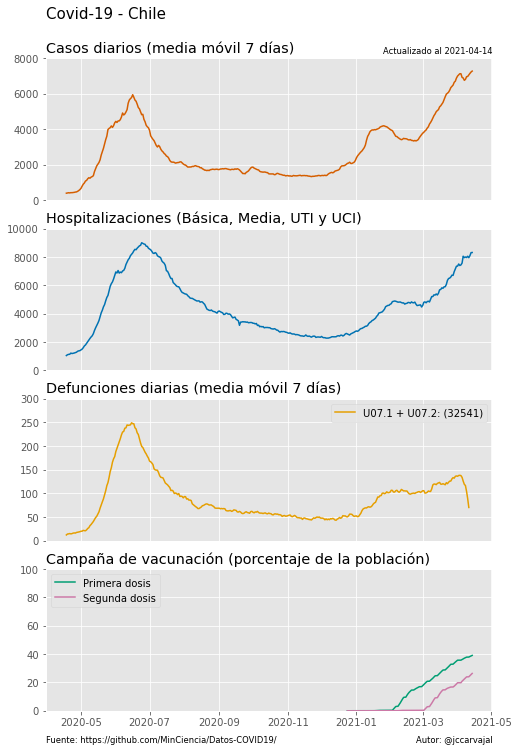

In [47]:
# Paso 3: Visualizar data
plt.style.use('ggplot')
plt.figure(figsize=(8,12))
plt.suptitle('Covid-19 - Chile', x=0.125, y=0.94, ha='left', va='top', fontsize = 15)

#plt.subplot(411)
ax1 = plt.subplot(411)
plt.plot(los_cuatro_casos['Fecha'], los_cuatro_casos['Nacional'], color='#D55E00')
plt.title('Casos diarios (media móvil 7 días)', loc='left')
plt.ylim(ymin=0)
plt.ylim(ymax=8000)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.grid(True)
plt.annotate('Actualizado al ' + str(ultima_fecha), 
             xy=(1,1), xytext=(0,12), xycoords='axes fraction',textcoords='offset points', 
             fontsize='small', va='top', ha='right')

#plt.subplot(412)
ax2 = plt.subplot(412, sharex = ax1)
plt.plot(los_cuatro_casos['Fecha'], los_cuatro_casos['Hospitalizaciones'], color='#0072B2')
plt.title('Hospitalizaciones (Básica, Media, UTI y UCI)', loc='left')
plt.ylim(ymin=0)
plt.ylim(ymax=10000)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.grid(True)

#plt.subplot(413)
ax3 = plt.subplot(413, sharex = ax1)
plt.plot(los_cuatro_casos['Fecha'], los_cuatro_casos['Confirmados y sospechosos'], color='#E69F00')
plt.title('Defunciones diarias (media móvil 7 días)', loc='left')
plt.ylim(ymin=0)
plt.ylim(ymax=300)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.legend(['U07.1 + U07.2: (' + str(total_conf_sosp) + ')',], loc='upper right')
plt.grid(True)

#plt.subplot(414)
ax3 = plt.subplot(414, sharex = ax1)
plt.plot(los_cuatro_casos['Fecha'], los_cuatro_casos['Primera_100'], color='#009E73')
plt.plot(los_cuatro_casos['Fecha'], los_cuatro_casos['Segunda_100'], color='#CC79A7')
plt.legend(['Primera dosis', 'Segunda dosis'], loc='upper left')
plt.title('Campaña de vacunación (porcentaje de la población)', loc='left')
plt.ylim(ymin=0)
plt.ylim(ymax=100)
plt.grid(True)
plt.annotate('Fuente: https://github.com/MinCiencia/Datos-COVID19/',
             xy=(0,0), xytext=(0,-25), xycoords='axes fraction', textcoords='offset points',
             fontsize='small', va='top', ha='left')
plt.annotate('Autor: @jccarvajal',
             xy=(1,0), xytext=(0,-25), xycoords='axes fraction', textcoords='offset points',
             fontsize='small', va='top', ha='right')

# Guardar figura en directorio
directory = 'Covid_19_Figures'
filename = 'Casos_diarios_hospitalizaciones_defunciones_vacunacion.png'
if not os.path.exists(directory):
    os.makedirs(directory)
savepath = os.path.join(directory, filename)
plt.savefig(savepath, dpi=200)
plt.show()